In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mtdlearn.mtd import MTD
from mtdlearn.preprocessing import PathEncoder
from mtdlearn.datasets import ChainGenerator

import warnings
warnings.filterwarnings("ignore")

## Generate data

In [2]:
cg = ChainGenerator(('A', 'B', 'C'), '>', 3, min_len=4, max_len=5)

In [3]:
x, y = cg.generate_data(1000)

In [4]:
x[:5]

array([['A>B>A>A'],
       ['C>B>C>C'],
       ['A>A>A>B'],
       ['C>A>A>A'],
       ['B>C>B>B>A']], dtype='<U9')

In [5]:
y[:5]

array(['A', 'B', 'C', 'A', 'C'], dtype='<U1')

## Encode paths

In [6]:
pe = PathEncoder(3)
pe.fit(x, y)

PathEncoder(order=3, r_just_string='null', sep='>')

In [7]:
pe.label_dict

{'A': 0, 'B': 1, 'C': 2, 'null': 3}

In [8]:
x_tr3, y_tr3 = pe.transform(x, y)

In [9]:
x_tr3[:5]

array([[1, 0, 0],
       [1, 2, 2],
       [0, 0, 1],
       [0, 0, 0],
       [1, 1, 0]])

In [10]:
y_tr3[:5]

array([0, 1, 2, 0, 2])

## Fitting model

In [11]:
model = MTD(n_dimensions=3, order=3)

In [12]:
model.fit(x_tr3, y_tr3)

log-likelihood value: -1066.012002137283


## Information criteria

In [13]:
model.aic

2160.024004274566

In [14]:
model.bic

2228.7325781803156

## Trained parameters

In [15]:
model.lambdas.round(3)

array([0.391, 0.334, 0.275])

In [16]:
model.transition_matrices.round(3)

array([[[0.105, 0.358, 0.537],
        [0.244, 0.43 , 0.326],
        [0.237, 0.305, 0.458]],

       [[0.468, 0.174, 0.358],
        [0.174, 0.445, 0.38 ],
        [0.087, 0.454, 0.459]],

       [[0.266, 0.432, 0.302],
        [0.408, 0.31 , 0.282],
        [0.579, 0.226, 0.196]]])

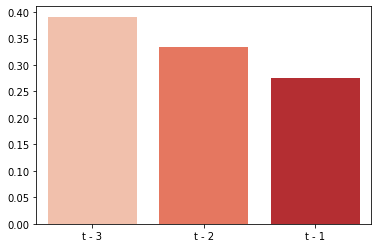

In [17]:
sns.barplot(x=[f't - {abs(i-3)}' for i in range(model.order)], y=model.lambdas, palette='Reds');

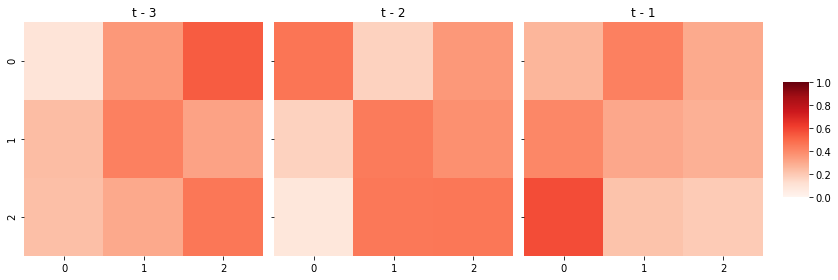

In [18]:
fig, axn = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 4))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    sns.heatmap(model.transition_matrices[i], ax=ax,
                cbar=i == 0,
                vmin=0, vmax=1,
                cmap='Reds',
                cbar_ax=None if i else cbar_ax)
    ax.set_title(f't - {3-i}')

fig.tight_layout(rect=[0, 0, .9, 1]);

## Predict

In [19]:
model.predict(pe.transform(np.array([['A>B>C'], ['B>B>A'], ['C>C>C']])))

array([2, 1, 2])

In [20]:
model.predict_proba(pe.transform(np.array([['A>B>C'], ['B>B>A'], ['C>C>C']])))

array([[0.25836419, 0.35070265, 0.39093316],
       [0.22674818, 0.43594709, 0.33730473],
       [0.28095738, 0.33279461, 0.38624801]])